In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

module_path = os.path.abspath(os.path.join('../py-conjugated/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import morphology_networks as net
import model_training as train
import model_testing as test
import physically_informed_loss_functions as pilf
import network_utils as nuts

In [16]:
with open('./hpo_results.json') as json_file:
    data = json.load(json_file)

data['0'].keys()

dict_keys(['lr', 'best_loss_epoch', 'best_acc_epoch', 'best_r2_epoch', 'time_loss', 'temp_loss', 'test_loss', 'time_acc', 'temp_acc', 'test_acc', 'time_r2', 'temp_r2', 'test_r2', 'train_time_loss', 'train_temp_loss'])

In [49]:
def plot_fit_results(fit_dict):
    lr = float(fit_dict['lr'])
    best_loss_epoch = int(fit_dict['best_loss_epoch'])
    best_acc_epoch = int(fit_dict['best_acc_epoch'])
    best_r2_epoch = int(fit_dict['best_r2_epoch'])
    time_loss = [float(i) for i in fit_dict['time_loss']]
    temp_loss = [float(i) for i in fit_dict['temp_loss']]
    test_loss = [float(i) for i in fit_dict['test_loss']]
    time_acc = [float(i) for i in fit_dict['time_acc']]
    temp_acc = [float(i) for i in fit_dict['temp_acc']]
    test_acc = [float(i) for i in fit_dict['test_acc']]
    time_r2 = [float(i) for i in fit_dict['time_r2']]
    temp_r2 = [float(i) for i in fit_dict['temp_r2']]
    test_r2 = [float(i) for i in fit_dict['test_r2']]
    train_time_loss = [float(i) for i in fit_dict['train_time_loss']]
    train_temp_loss = [float(i) for i in fit_dict['train_temp_loss']]

    epochs = np.arange(0, (len(test_loss)), 1)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 6))
    ax1.plot(epochs, time_loss, c = 'r', label = 'time loss')
    ax1.plot(epochs, temp_loss, c = 'b', label = 'temp loss')
    ax1.plot(epochs, test_loss, c = 'k', label = 'total loss')
    ax1.plot(epochs, train_time_loss, c = 'r', linestyle = '-.', label = 'time train loss')
    ax1.plot(epochs, train_temp_loss, c = 'b', linestyle = '-.', label = 'time train loss')
    ax1.scatter(best_loss_epoch, min(test_loss), s = 64, c = 'c')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('MSE Loss')
    ax1.legend(loc = 'best')
    ax1.set_title(f'MSE Loss with lr = {lr}')

    ax2.plot(epochs, time_acc, c = 'r', label = 'time acc')
    ax2.plot(epochs, temp_acc, c = 'b', label = 'temp acc')
    ax2.plot(epochs, test_acc, c = 'k', label = 'total acc')
    ax2.scatter(best_acc_epoch, min(test_acc), s = 64, c = 'c')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('MAPE Loss')
    ax2.legend(loc = 'best')
    ax2.set_title(f'MAPE with lr = {lr}')

    ax3.plot(epochs, time_r2, c = 'r', label = 'time R$^2$')
    ax3.plot(epochs, temp_r2, c = 'b', label = 'temp R$^2$')
    ax3.plot(epochs, test_r2, c = 'k', label = 'total R$^2$')
    ax3.scatter(best_r2_epoch, max(test_r2), s = 64, c = 'c')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('R$^2$')
    ax3.legend(loc = 'best')
    ax3.set_title(f'R$^2$ with lr = {lr}')
    
    plt.tight_layout()
    plt.show()


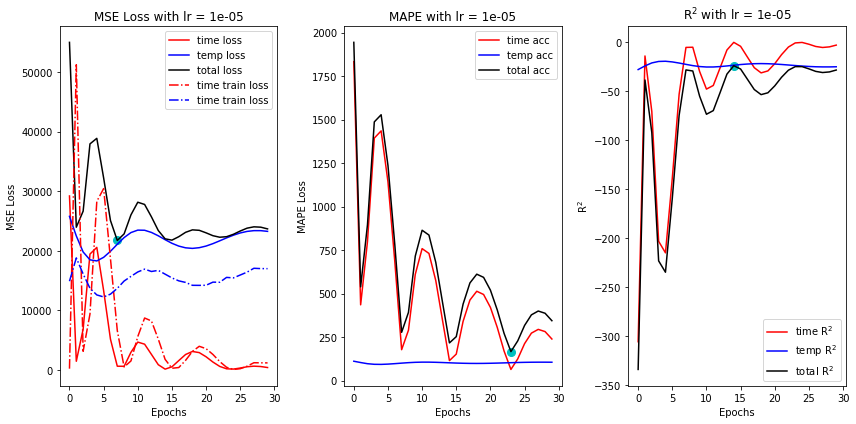

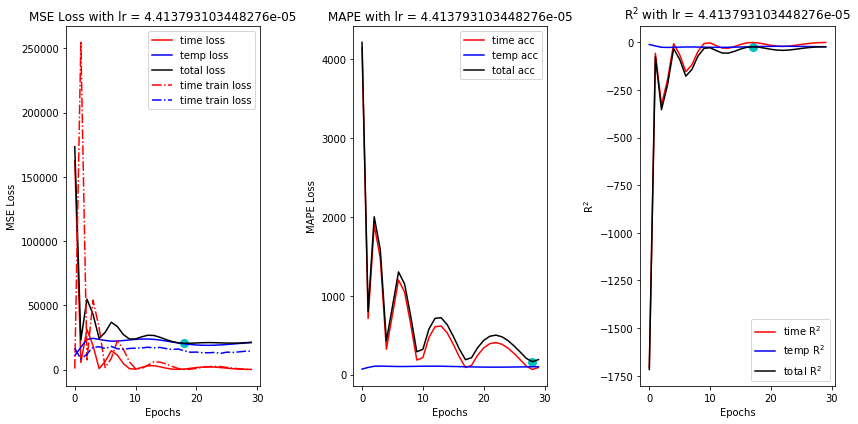

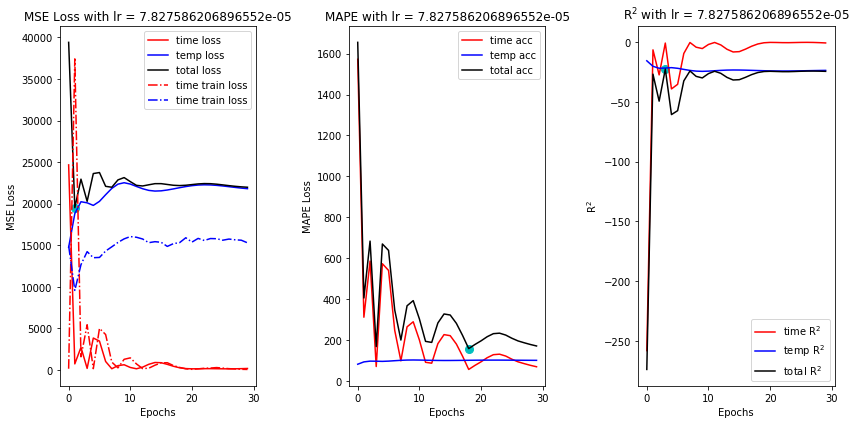

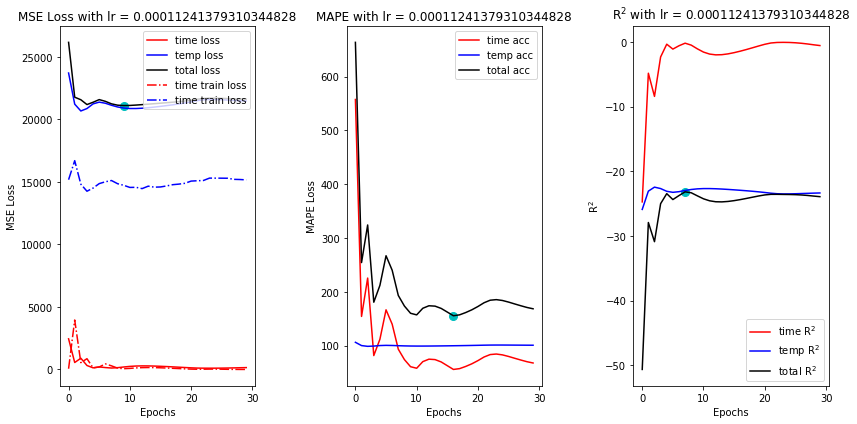

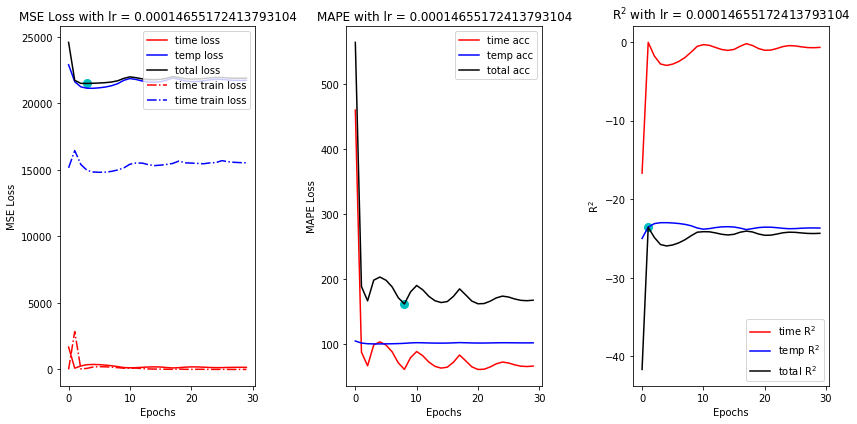

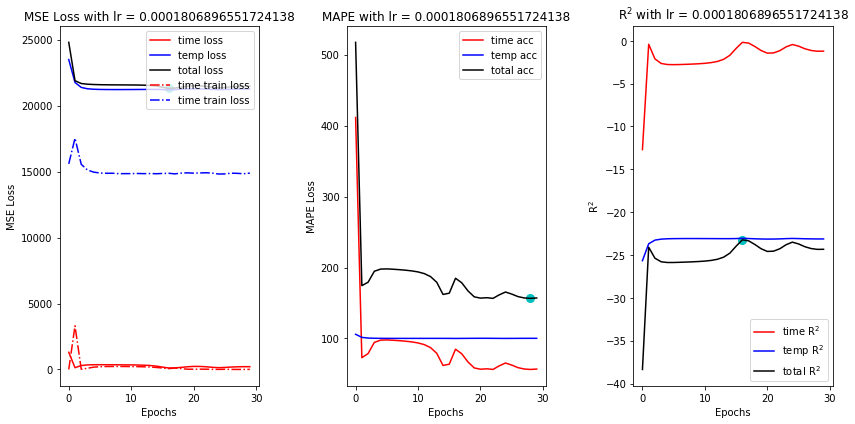

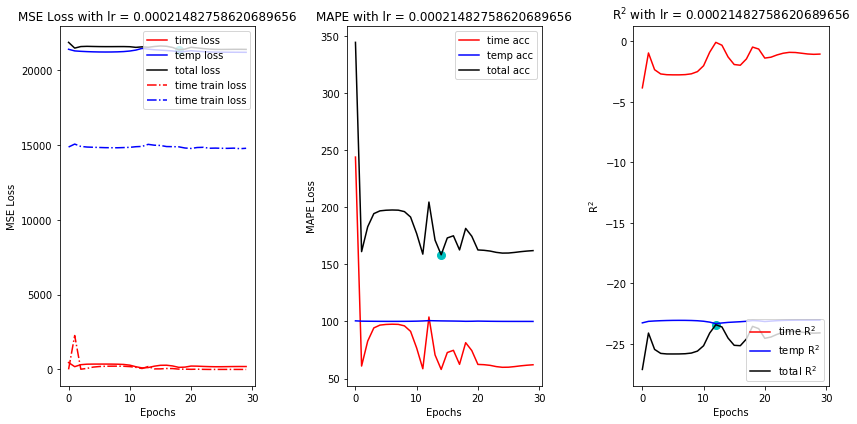

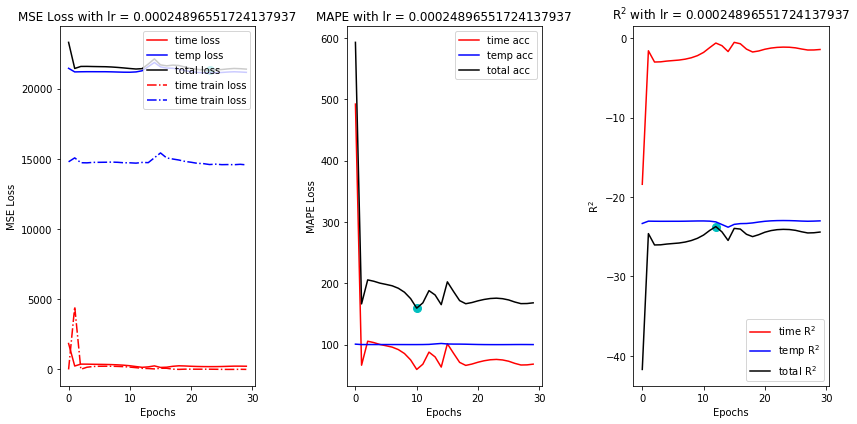

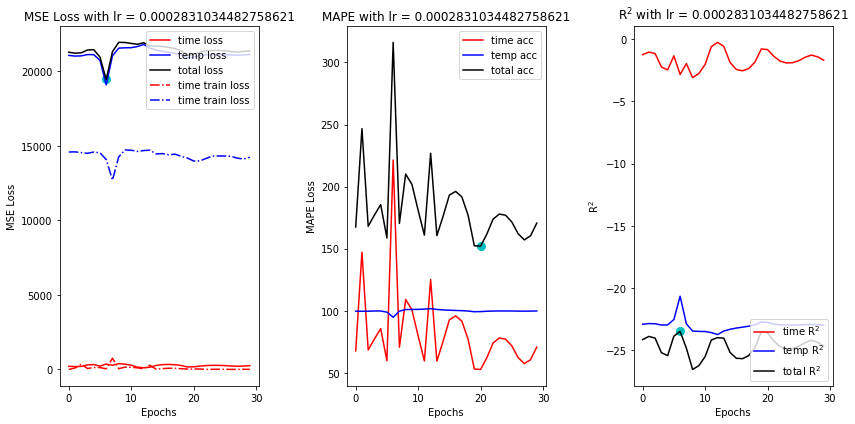

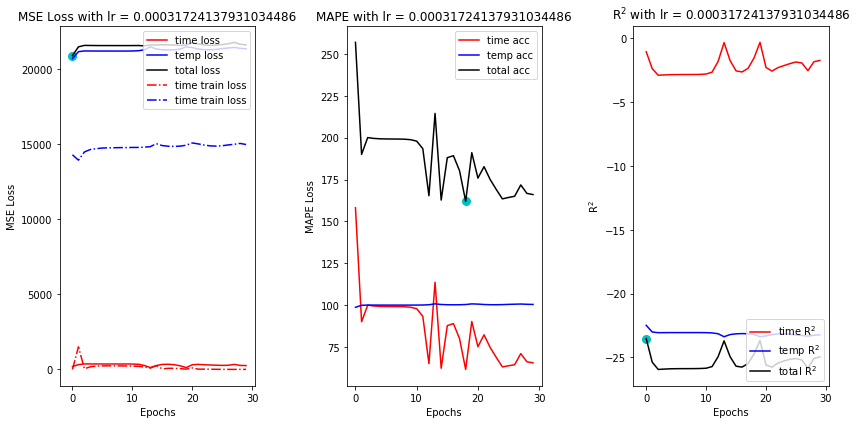

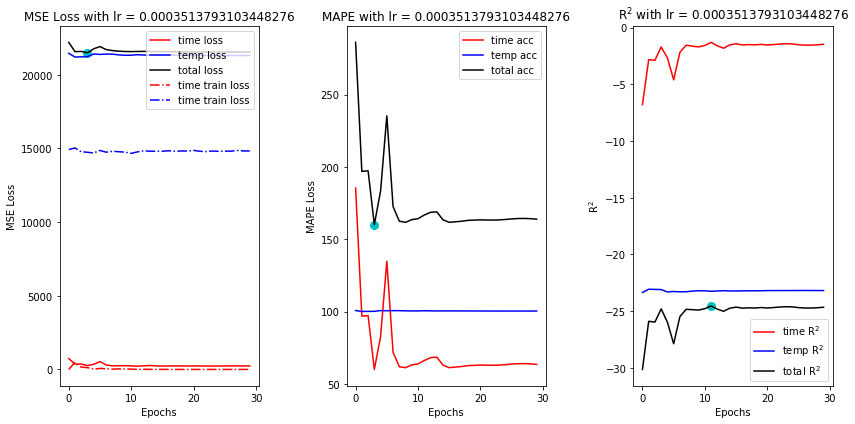

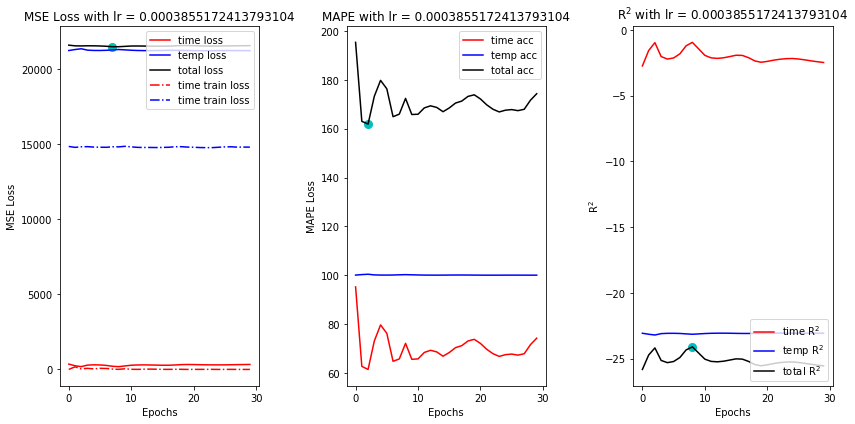

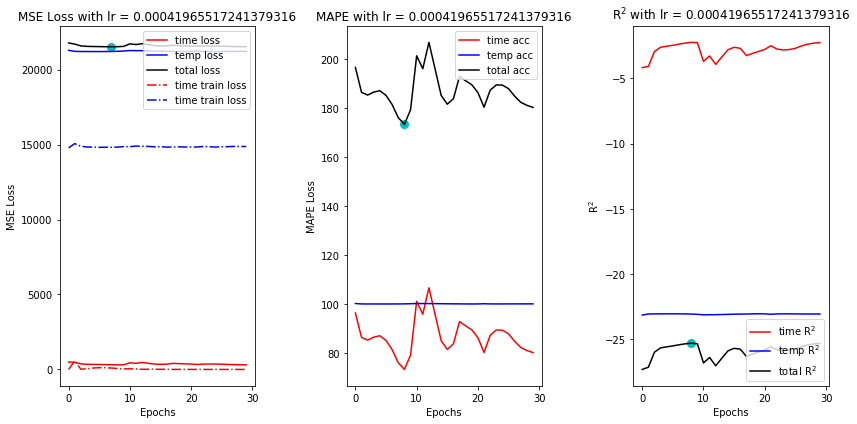

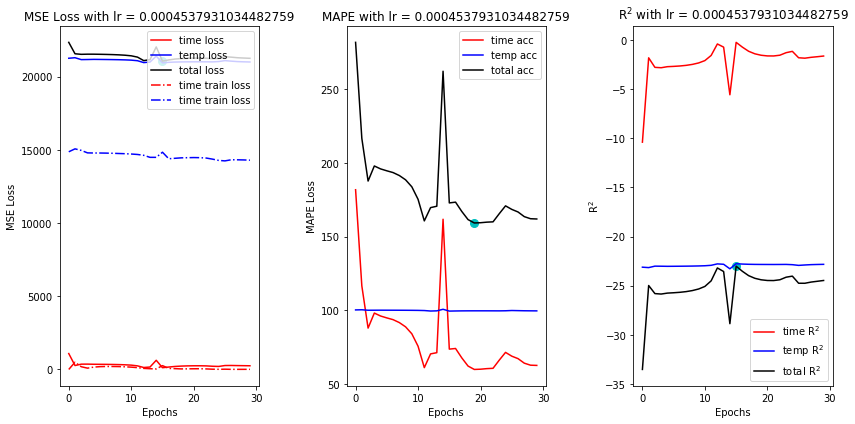

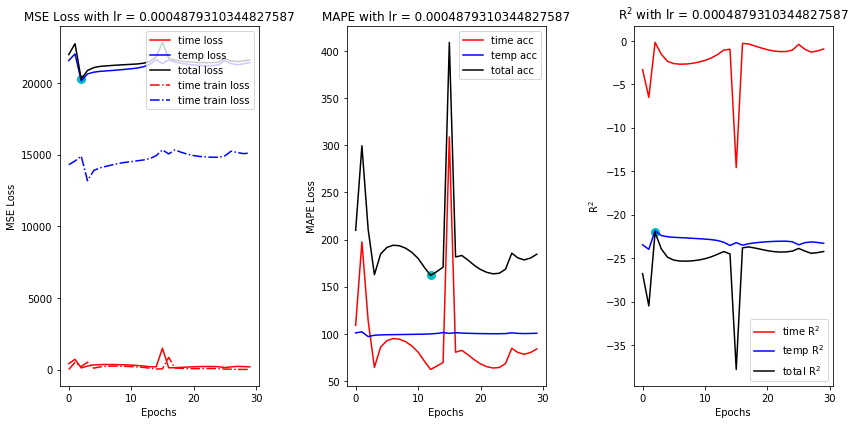

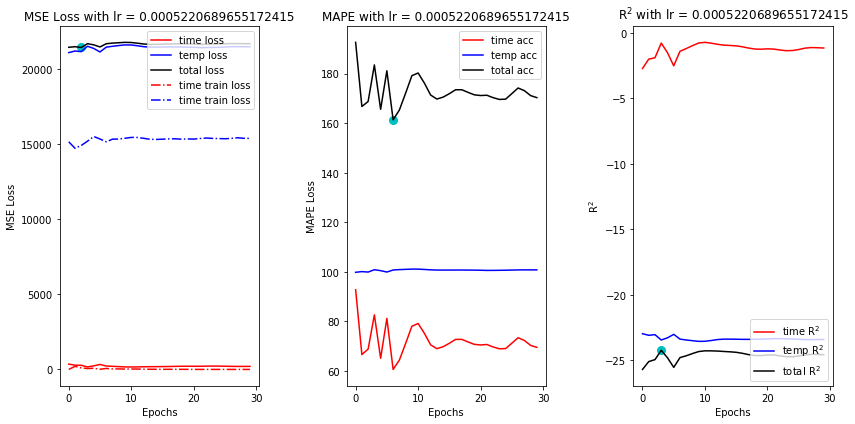

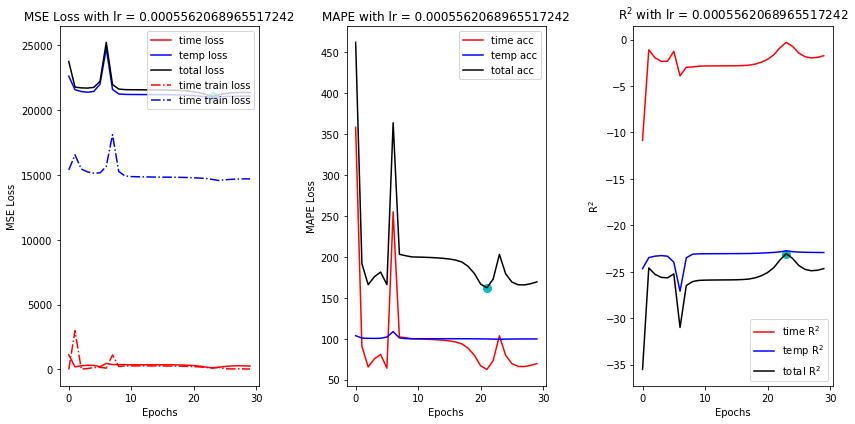

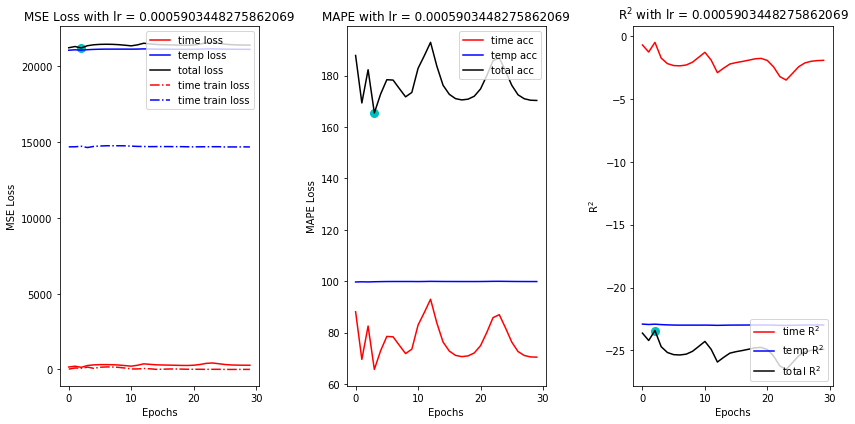

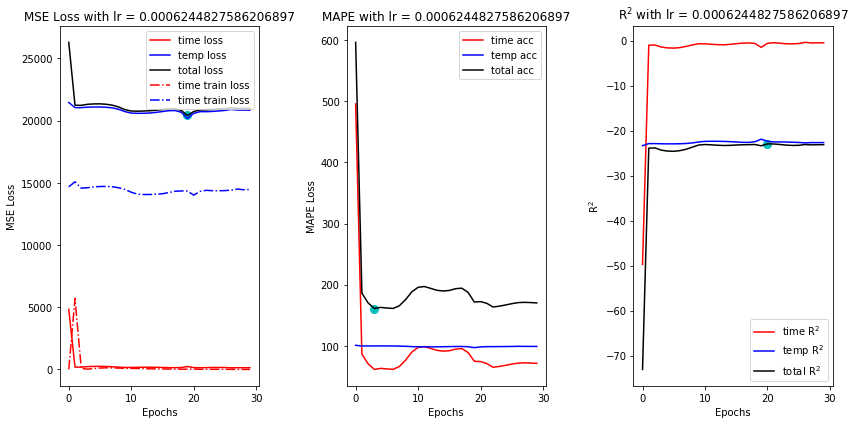

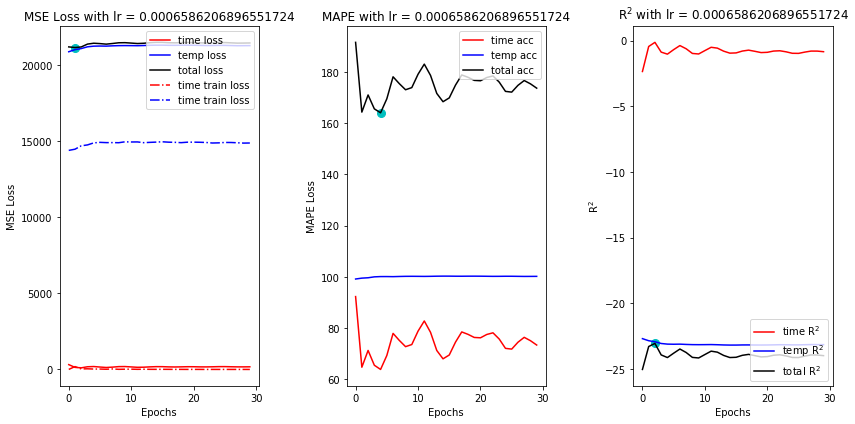

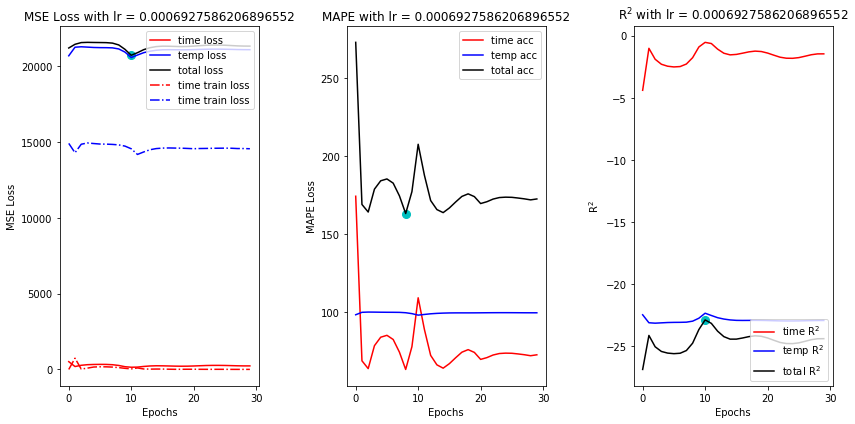

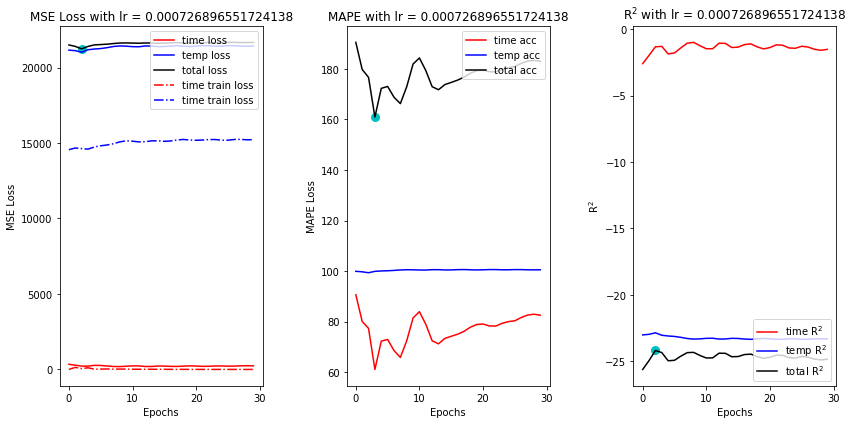

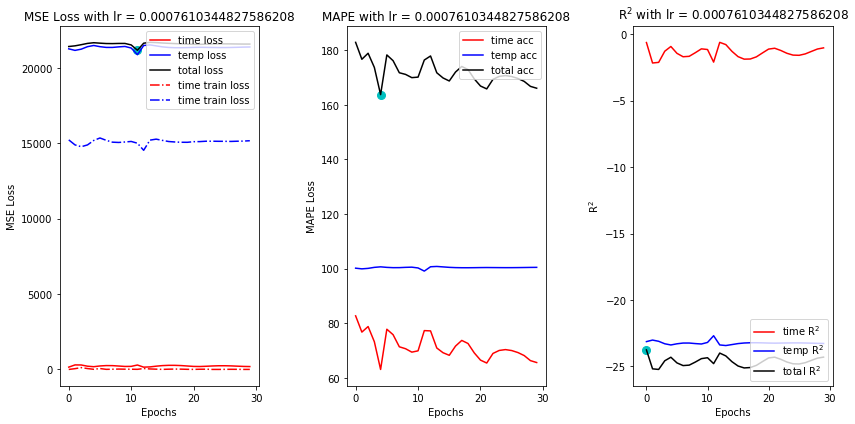

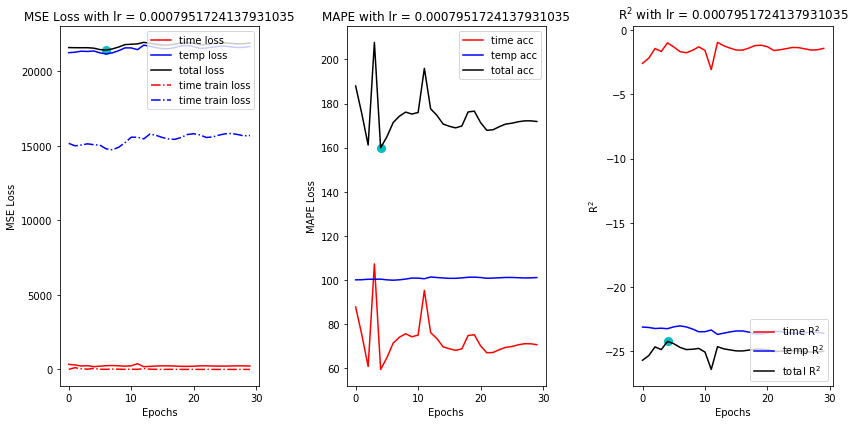

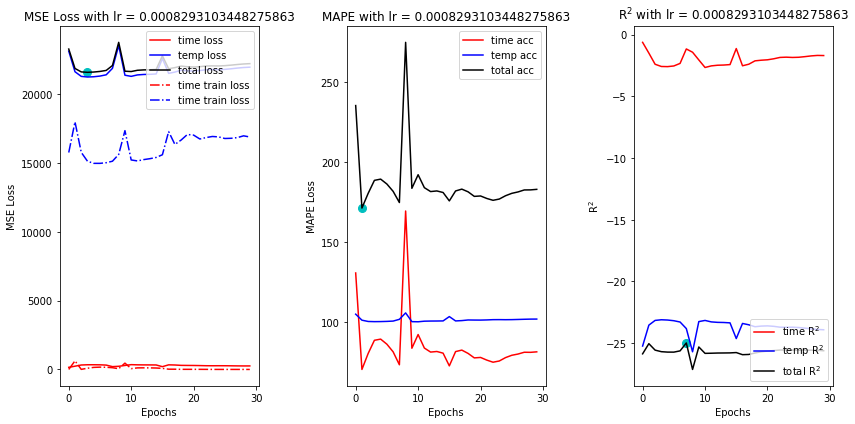

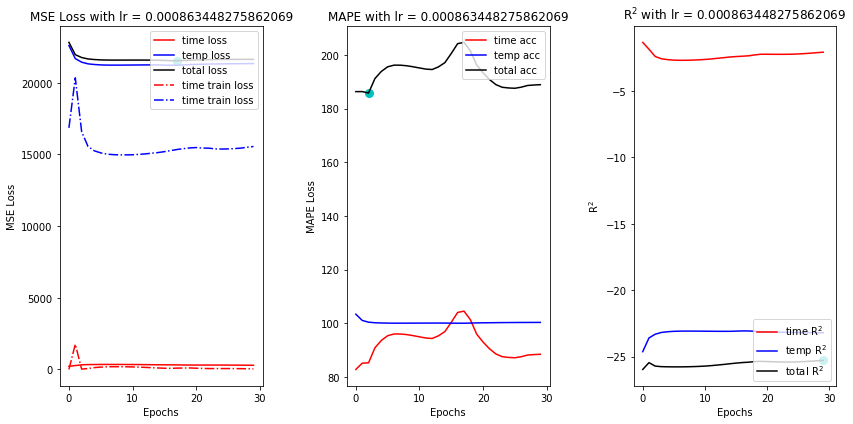

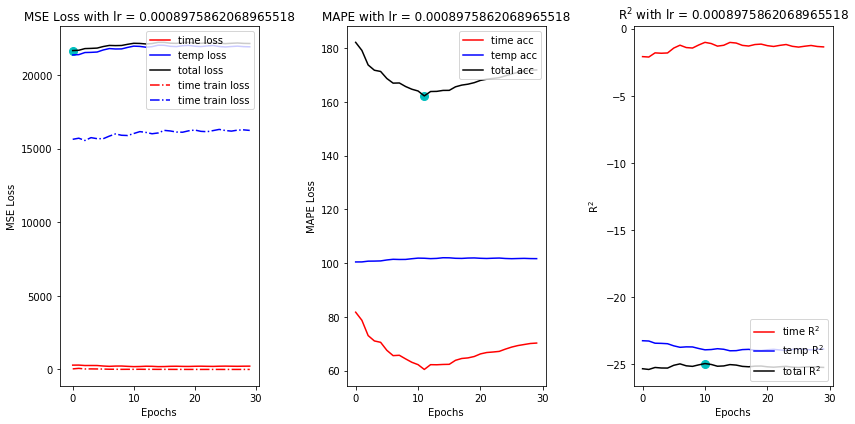

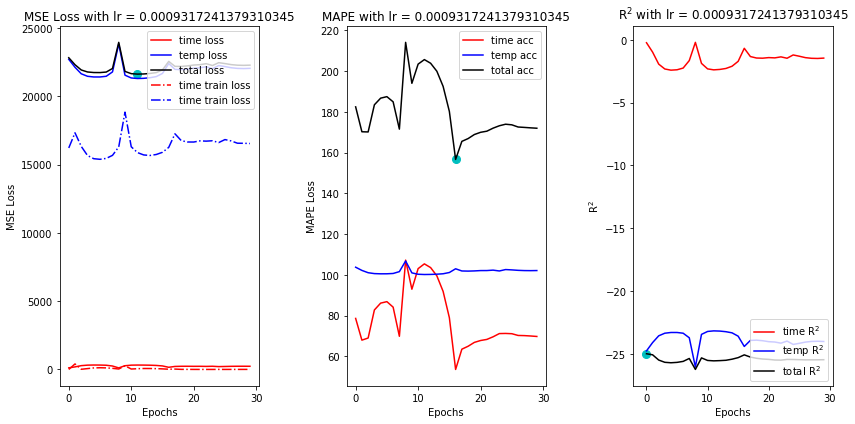

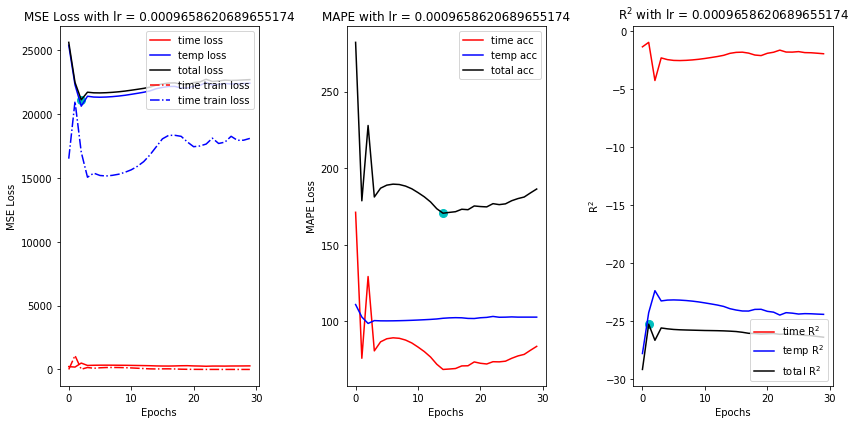

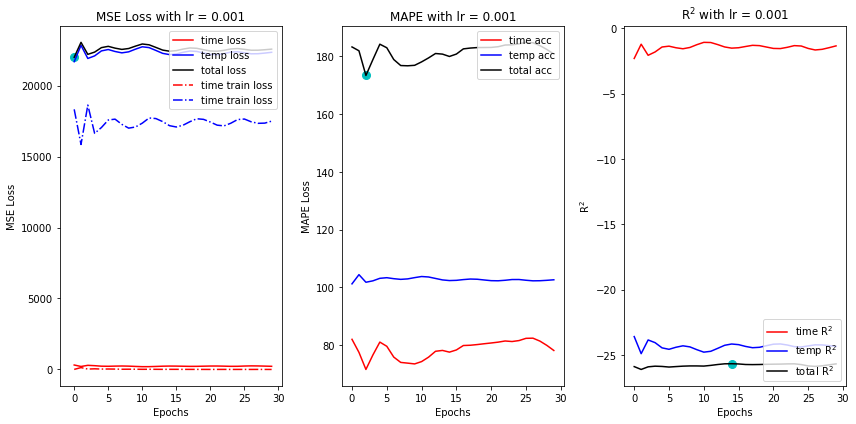

In [50]:
for key, fit_dict in data.items():
    plot_fit_results(fit_dict)